**Loading the Beverage Dataset**

In [288]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [289]:
root_path = '/content/gdrive/My Drive/Beverage.csv' 

**Importing Required Libraries**

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Reading the Dataset**

In [291]:
Beverage = pd.read_csv(root_path)

In [292]:
Beverage.shape

(1364797, 18)

In [293]:
Beverage.head()

,Unnamed: 0,time,Blower,Co2,Date_coder,Day,Filler,Hour,Labeller,Month,PSP,Palletizer,Plasmax,Preform,Uday,Week,Year,product
0,0,2020-08-16T00:40:31.755413Z,NaN,1452444.0,NaN,16,NaN,6,NaN,8,NaN,NaN,NaN,NaN,16/08/2020,33,2020,cocacola
1,1,2020-08-16T00:40:34.724393Z,NaN,1452444.0,NaN,16,NaN,6,NaN,8,NaN,NaN,NaN,NaN,16/08/2020,33,2020,cocacola
2,2,2020-08-16T00:40:37.700167Z,NaN,1452444.0,NaN,16,NaN,6,NaN,8,NaN,NaN,NaN,NaN,16/08/2020,33,2020,cocacola
3,3,2020-08-16T00:40:40.669245Z,NaN,1452444.0,NaN,16,NaN,6,NaN,8,NaN,NaN,NaN,NaN,16/08/2020,33,2020,cocacola
4,4,2020-08-16T00:40:43.620928Z,NaN,1452444.0,NaN,16,NaN,6,NaN,8,NaN,NaN,NaN,NaN,16/08/2020,33,2020,cocacola


**Checking Null Values**

In [294]:
Beverage.isnull().sum()

Unnamed: 0          0
time                0
Blower        1057390
Co2           1270521
Date_coder    1111734
Day                 0
Filler         961695
Hour                0
Labeller       961695
Month               0
PSP           1361107
Palletizer    1361107
Plasmax       1061536
Preform       1057390
Uday                0
Week                0
Year                0
product             0
dtype: int64

In [295]:
Beverage.describe()

,Unnamed: 0,Blower,Co2,Date_coder,Day,Filler,Hour,Labeller,Month,PSP,Palletizer,Plasmax,Preform,Week,Year
count,1.364797e+06,307407.000000,9.427600e+04,253063.000000,1.364797e+06,403102.000000,1.364797e+06,403102.000000,1364797.0,3690.000000,3690.000000,303261.000000,307407.000000,1.364797e+06,1364797.0
mean,6.823980e+05,20.175396,2.029638e+06,18.600728,2.025061e+01,8.699076,1.125214e+01,8.649066,8.0,38.725203,38.725203,15.615467,20.175396,3.329716e+01,2020.0
std,3.939831e+05,26.734445,4.917192e+05,21.243542,3.106284e+00,6.690983,7.113220e+00,6.711026,0.0,73.896041,73.896041,16.674202,26.734445,4.570081e-01,0.0
min,0.000000e+00,0.000000,1.436417e+06,0.000000,1.600000e+01,0.000000,0.000000e+00,0.000000,8.0,0.000000,0.000000,0.000000,0.000000,3.300000e+01,2020.0
25%,3.411990e+05,7.000000,1.451199e+06,10.000000,1.800000e+01,10.000000,5.000000e+00,9.000000,8.0,25.000000,25.000000,10.000000,7.000000,3.300000e+01,2020.0
50%,6.823980e+05,13.000000,2.446978e+06,10.000000,2.000000e+01,10.000000,1.100000e+01,10.000000,8.0,38.000000,38.000000,10.000000,13.000000,3.300000e+01,2020.0
75%,1.023597e+06,18.000000,2.449111e+06,20.000000,2.300000e+01,10.000000,1.800000e+01,10.000000,8.0,46.000000,46.000000,11.000000,18.000000,3.400000e+01,2020.0
max,1.364796e+06,3385.000000,2.449111e+06,3383.000000,2.600000e+01,3382.000000,2.300000e+01,3396.000000,8.0,3109.000000,3109.000000,3394.000000,3385.000000,3.400000e+01,2020.0


**Correlation Matrix**

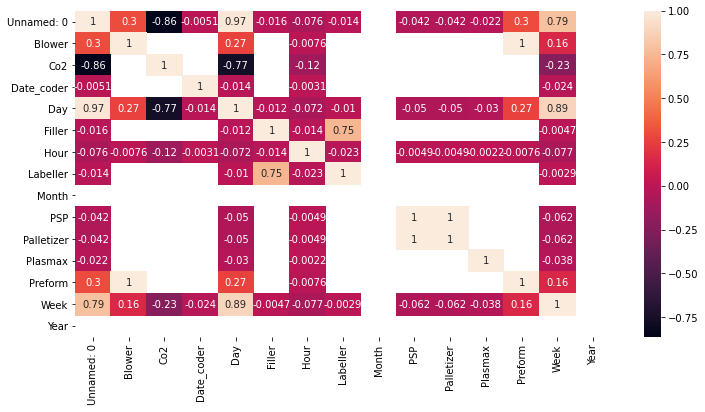

In [296]:
cor = Beverage.corr()
Fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(cor, annot = True)

**Removing Unnecessary Columns**

In [297]:
cols = ['time','Blower','Filler','Labeller']
Beverage = Beverage[cols]

In [298]:
Beverage['time'] = pd.to_datetime(Beverage['time'], format="%Y/%m/%d %H:%M:%S")

In [299]:
Beverage.dtypes

time        datetime64[ns, UTC]
Blower                  float64
Filler                  float64
Labeller                float64
dtype: object

In [300]:
Beverage.head()

,time,Blower,Filler,Labeller
0,2020-08-16 00:40:31.755413+00:00,NaN,NaN,NaN
1,2020-08-16 00:40:34.724393+00:00,NaN,NaN,NaN
2,2020-08-16 00:40:37.700167+00:00,NaN,NaN,NaN
3,2020-08-16 00:40:40.669245+00:00,NaN,NaN,NaN
4,2020-08-16 00:40:43.620928+00:00,NaN,NaN,NaN


**Setting Time column as Index**

In [301]:
Beverage = Beverage.set_index('time')

In [302]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,8)

In [303]:
beverage_df = Beverage.resample('H').sum()
beverage_df.head(50)

,Blower,Filler,Labeller
time,,,
2020-08-16 00:00:00+00:00,0.0,0.0,2.0
2020-08-16 01:00:00+00:00,0.0,0.0,0.0
2020-08-16 02:00:00+00:00,0.0,0.0,0.0
2020-08-16 03:00:00+00:00,0.0,0.0,0.0
2020-08-16 04:00:00+00:00,0.0,0.0,0.0
2020-08-16 05:00:00+00:00,0.0,0.0,0.0
2020-08-16 06:00:00+00:00,0.0,0.0,0.0
2020-08-16 07:00:00+00:00,0.0,0.0,0.0
2020-08-16 08:00:00+00:00,0.0,3.0,0.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff071b32828>,
      dtype=object)

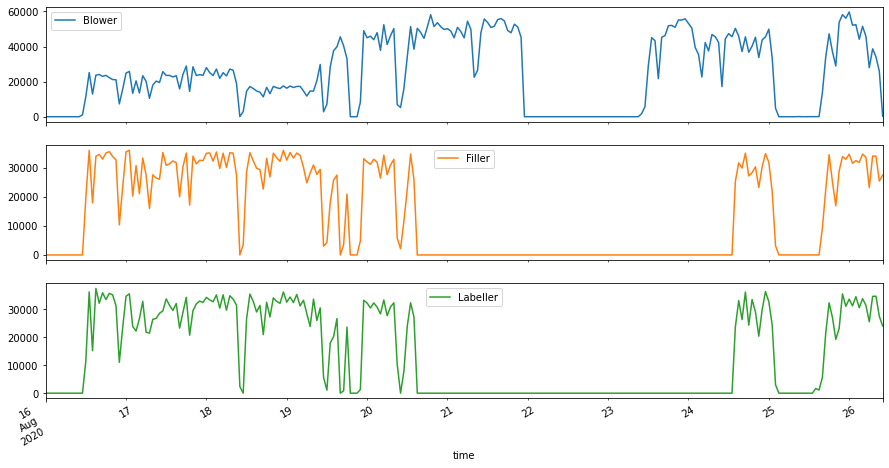

In [304]:
Beverage.resample('H').sum().plot(subplots=True)

###### As the normal efficiency of machine is 10 bottles/sec or 36000 bottles/hour, so will divide all the blower value which exceeded 36000/hr by 2

In [305]:
beverage_df['Blower'] =beverage_df['Blower'].apply(lambda x: x/2 if x>=36000 else x)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0719bf780>,
      dtype=object)

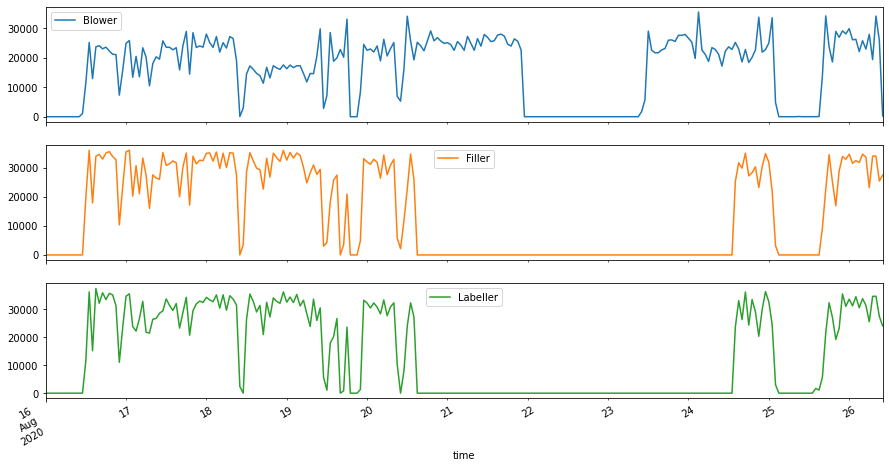

In [306]:
beverage_df.plot(subplots=True)

Now let's calculate time differences between each records to find out break points present in data

In [307]:
Beverage = Beverage.reset_index()

In [308]:
Beverage["lagged_time"] = Beverage.time.shift(1)
Beverage["Time_diff"] = (Beverage["time"] - Beverage["lagged_time"])
Beverage['tot_mins_diff'] = (Beverage.time - Beverage.lagged_time) / pd.Timedelta(minutes=1)

In [309]:
Beverage['machine_condition'] = np.where(Beverage['tot_mins_diff'] > 10 , "Downtime", "working")
Beverage.head()

,time,Blower,Filler,Labeller,lagged_time,Time_diff,tot_mins_diff,machine_condition
0,2020-08-16 00:40:31.755413+00:00,NaN,NaN,NaN,NaT,NaT,NaN,working
1,2020-08-16 00:40:34.724393+00:00,NaN,NaN,NaN,2020-08-16 00:40:31.755413+00:00,0 days 00:00:02.968980,0.049483,working
2,2020-08-16 00:40:37.700167+00:00,NaN,NaN,NaN,2020-08-16 00:40:34.724393+00:00,0 days 00:00:02.975774,0.049596,working
3,2020-08-16 00:40:40.669245+00:00,NaN,NaN,NaN,2020-08-16 00:40:37.700167+00:00,0 days 00:00:02.969078,0.049485,working
4,2020-08-16 00:40:43.620928+00:00,NaN,NaN,NaN,2020-08-16 00:40:40.669245+00:00,0 days 00:00:02.951683,0.049195,working


In [310]:
Beverage["machine_condition"].value_counts()

working     1364786
Downtime         11
Name: machine_condition, dtype: int64

Fetching all the rows where we are getting Downtime

In [311]:
Downtime_data = Beverage.loc[(Beverage['machine_condition'] == 'Downtime')]
Downtime_data.head(11)

,time,Blower,Filler,Labeller,lagged_time,Time_diff,tot_mins_diff,machine_condition
402100,2020-08-18 11:45:29.669503+00:00,3.0,NaN,NaN,2020-08-18 10:51:22.047472+00:00,0 days 00:54:07.622031,54.127034,Downtime
881375,2020-08-21 09:06:29.395212+00:00,7.0,NaN,NaN,2020-08-21 08:28:33.414716+00:00,0 days 00:37:55.980496,37.933008,Downtime
959233,2020-08-23 10:03:49.438415+00:00,4.0,NaN,NaN,2020-08-21 23:06:22.222952+00:00,1 days 10:57:27.215463,2097.453591,Downtime
959371,2020-08-23 11:16:06.717764+00:00,NaN,NaN,NaN,2020-08-23 10:10:08.277038+00:00,0 days 01:05:58.440726,65.974012,Downtime
959429,2020-08-23 11:48:47.813784+00:00,NaN,NaN,NaN,2020-08-23 11:26:32.394138+00:00,0 days 00:22:15.419646,22.256994,Downtime
976260,2020-08-23 15:23:12.695103+00:00,NaN,NaN,NaN,2020-08-23 15:08:41.655947+00:00,0 days 00:14:31.039156,14.517319,Downtime
1140406,2020-08-24 18:59:47.062442+00:00,NaN,0.0,6.0,2020-08-24 18:49:18.197170+00:00,0 days 00:10:28.865272,10.481088,Downtime
1204056,2020-08-25 09:00:55.286625+00:00,22.0,NaN,NaN,2020-08-25 02:25:52.347694+00:00,0 days 06:35:02.938931,395.048982,Downtime
1204060,2020-08-25 10:14:55.661248+00:00,NaN,0.0,0.0,2020-08-25 09:00:58.253104+00:00,0 days 01:13:57.408144,73.956802,Downtime
1204061,2020-08-25 14:42:04.292387+00:00,NaN,0.0,2.0,2020-08-25 10:14:55.661248+00:00,0 days 04:27:08.631139,267.143852,Downtime


In [312]:
Beverage = Beverage.set_index('time')

In [313]:
Beverage.head()

,Blower,Filler,Labeller,lagged_time,Time_diff,tot_mins_diff,machine_condition
time,,,,,,,
2020-08-16 00:40:31.755413+00:00,NaN,NaN,NaN,NaT,NaT,NaN,working
2020-08-16 00:40:34.724393+00:00,NaN,NaN,NaN,2020-08-16 00:40:31.755413+00:00,0 days 00:00:02.968980,0.049483,working
2020-08-16 00:40:37.700167+00:00,NaN,NaN,NaN,2020-08-16 00:40:34.724393+00:00,0 days 00:00:02.975774,0.049596,working
2020-08-16 00:40:40.669245+00:00,NaN,NaN,NaN,2020-08-16 00:40:37.700167+00:00,0 days 00:00:02.969078,0.049485,working
2020-08-16 00:40:43.620928+00:00,NaN,NaN,NaN,2020-08-16 00:40:40.669245+00:00,0 days 00:00:02.951683,0.049195,working


In [314]:
downtime_1 = beverage_df.loc["2020-08-16 00:40:34.724393+00:00":"2020-08-18 11:45:29.669503+00:00"]
downtime_1.head()

,Blower,Filler,Labeller
time,,,
2020-08-16 01:00:00+00:00,0.0,0.0,0.0
2020-08-16 02:00:00+00:00,0.0,0.0,0.0
2020-08-16 03:00:00+00:00,0.0,0.0,0.0
2020-08-16 04:00:00+00:00,0.0,0.0,0.0
2020-08-16 05:00:00+00:00,0.0,0.0,0.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff06ce2f198>,
      dtype=object)

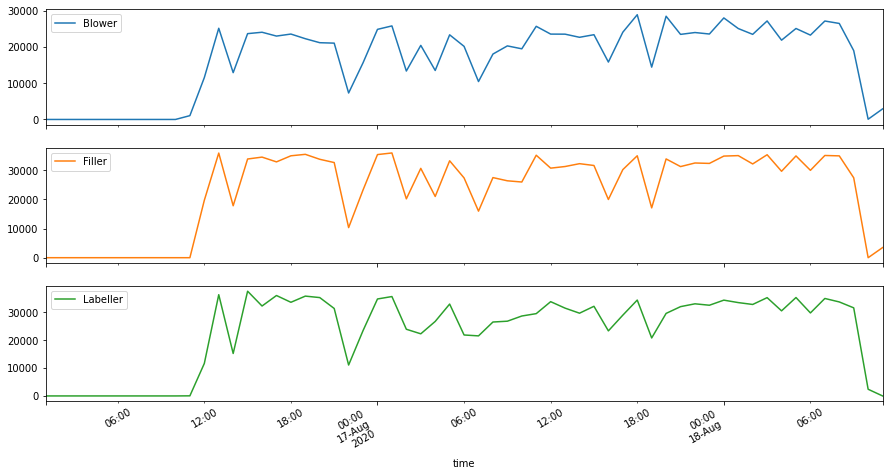

In [315]:
downtime_1.plot(subplots=True)

In [316]:
downtime_2 = beverage_df.loc["2020-08-18 11:45:29.669503+00:00":"2020-08-21 09:06:29.395212+00:00"]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff071817160>,
      dtype=object)

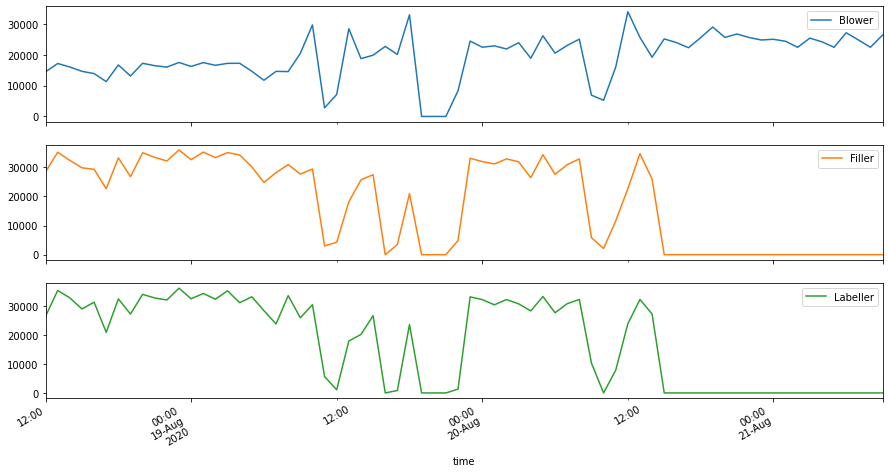

In [317]:
downtime_2.plot(subplots=True)

In [318]:
downtime_3 = beverage_df.loc["2020-08-21 09:06:29.395212+00:00":"2020-08-23 10:03:49.438415+00:00"]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff06cc05f60>,
      dtype=object)

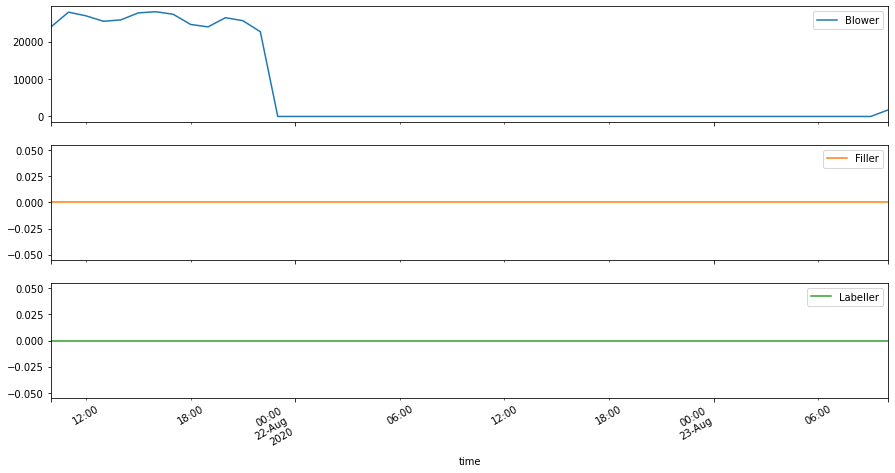

In [319]:
downtime_3.plot(subplots=True)

In [320]:
beverage_df.head()

,Blower,Filler,Labeller
time,,,
2020-08-16 00:00:00+00:00,0.0,0.0,2.0
2020-08-16 01:00:00+00:00,0.0,0.0,0.0
2020-08-16 02:00:00+00:00,0.0,0.0,0.0
2020-08-16 03:00:00+00:00,0.0,0.0,0.0
2020-08-16 04:00:00+00:00,0.0,0.0,0.0


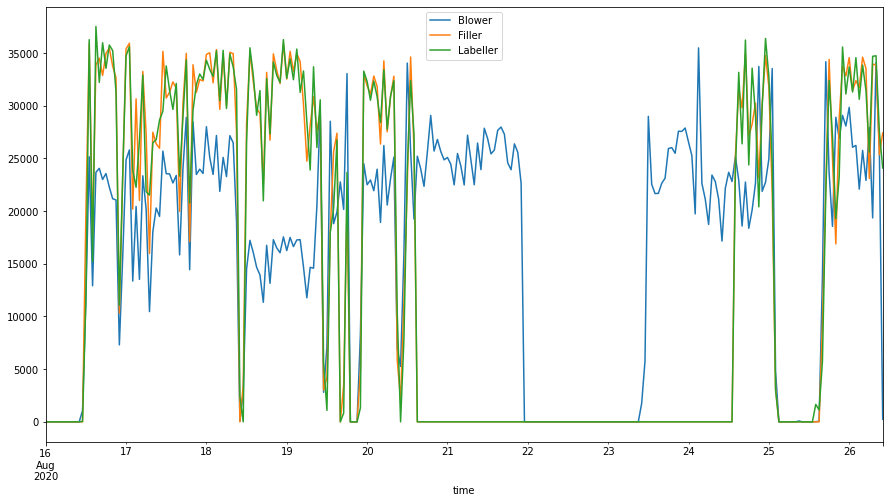

In [321]:
beverage_df.plot()

In [322]:
Beverage.head()

,Blower,Filler,Labeller,lagged_time,Time_diff,tot_mins_diff,machine_condition
time,,,,,,,
2020-08-16 00:40:31.755413+00:00,NaN,NaN,NaN,NaT,NaT,NaN,working
2020-08-16 00:40:34.724393+00:00,NaN,NaN,NaN,2020-08-16 00:40:31.755413+00:00,0 days 00:00:02.968980,0.049483,working
2020-08-16 00:40:37.700167+00:00,NaN,NaN,NaN,2020-08-16 00:40:34.724393+00:00,0 days 00:00:02.975774,0.049596,working
2020-08-16 00:40:40.669245+00:00,NaN,NaN,NaN,2020-08-16 00:40:37.700167+00:00,0 days 00:00:02.969078,0.049485,working
2020-08-16 00:40:43.620928+00:00,NaN,NaN,NaN,2020-08-16 00:40:40.669245+00:00,0 days 00:00:02.951683,0.049195,working


**Building LSTM Model for Prediction**

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (e.g. images), but also entire sequences of data (such as speech or video inputs).

LSTM models are able to store information over a period of time.

This characteristic is extremely useful when we deal with Time-Series or Sequential Data. When using an LSTM model we are free and able to decide what information will be stored and what discarded. We do that using the “gates”.

In [323]:
# Removing unncessary columns
df = beverage_df.drop(['Filler','Labeller'], axis=1)
df.head()

,Blower
time,
2020-08-16 00:00:00+00:00,0.0
2020-08-16 01:00:00+00:00,0.0
2020-08-16 02:00:00+00:00,0.0
2020-08-16 03:00:00+00:00,0.0
2020-08-16 04:00:00+00:00,0.0


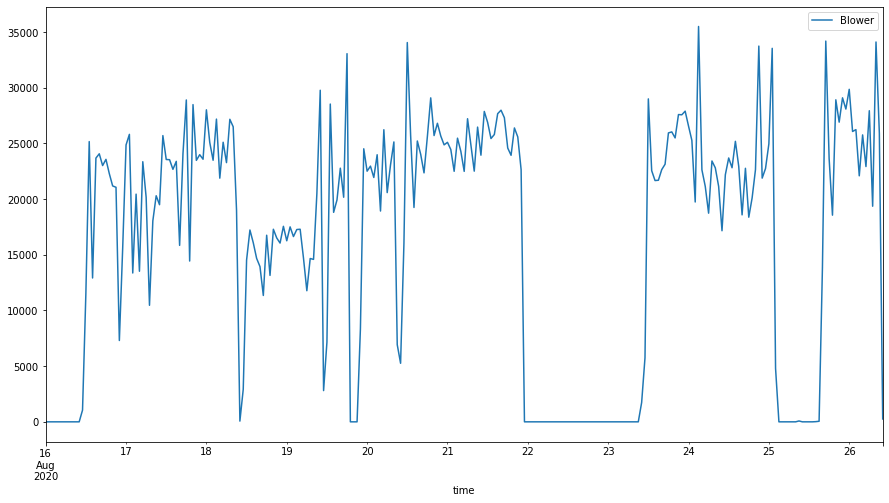

In [324]:
#Plotting the data
import matplotlib.pyplot as plt
df.plot()

In [325]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [326]:
# fix random seed for reproducibility
numpy.random.seed(7)

**Scaling the Data**

In [327]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

**Splitting the dataset**

With time series data, the sequence of values is important. A simple method that we can use is to split the ordered dataset into train and test datasets. 

The code below calculates the index of the split point and separates the data into the training datasets with 70% of the observations that we can use to train our model, leaving the remaining 30% for testing the model.

In [328]:
# split into train and test sets
train_size = int(len(df) * 0.70)
test_size = len(df) - train_size
train, test = df[0:train_size,:], df[train_size:len(df),:]
print(len(train), len(test))

175 76


Now we can define a function to create a new dataset, as described above.

The function takes two arguments: The dataset, which is a NumPy array that we want to convert into a dataset, and the look_back, which is the number of previous time steps to use as input variables to predict the next time period — in this case defaulted to 1.

This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).

In [329]:
# convert an array of values into a dataset matrix
def create_dataset(df, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df)-look_back-1):
		a = df[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [330]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

Let’s take a look at the effect of this function on the first rows of the dataset.

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

Currently, our data is in the form: [samples, features] and we are framing the problem as one time step for each sample. 

We can transform the prepared train and test input data into the expected structure using numpy.reshape() as follows:

In [331]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [332]:
print(trainX.shape)
print(testX.shape)

(164, 10, 1)
(65, 10, 1)


We are now ready to design and fit our LSTM network for this problem.

The network has a visible layer with 1 input, a hidden layer with 8 nuerons and an output layer that makes a single value prediction. 

The ReLU activation function is used for the LSTM blocks. 

The network is trained for 300 epochs and a batch size of total samples is used.

In [333]:
model=Sequential()
model.add(LSTM(8,return_sequences=True,input_shape=(look_back,1)))
model.add(LSTM(8,return_sequences=True))
model.add(LSTM(8))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX, trainY, validation_data=(testX,testY), epochs=300, batch_size=5, verbose=2)

Epoch 1/300
33/33 - 1s - loss: 0.2466 - val_loss: 0.1894
Epoch 2/300
33/33 - 0s - loss: 0.0829 - val_loss: 0.0892
Epoch 3/300
33/33 - 0s - loss: 0.0664 - val_loss: 0.0916
Epoch 4/300
33/33 - 0s - loss: 0.0627 - val_loss: 0.0897
Epoch 5/300
33/33 - 0s - loss: 0.0594 - val_loss: 0.0905
Epoch 6/300
33/33 - 0s - loss: 0.0589 - val_loss: 0.0897
Epoch 7/300
33/33 - 0s - loss: 0.0572 - val_loss: 0.0922
Epoch 8/300
33/33 - 0s - loss: 0.0559 - val_loss: 0.0906
Epoch 9/300
33/33 - 0s - loss: 0.0557 - val_loss: 0.0915
Epoch 10/300
33/33 - 0s - loss: 0.0558 - val_loss: 0.0923
Epoch 11/300
33/33 - 0s - loss: 0.0551 - val_loss: 0.0907
Epoch 12/300
33/33 - 0s - loss: 0.0555 - val_loss: 0.0938
Epoch 13/300
33/33 - 0s - loss: 0.0552 - val_loss: 0.0943
Epoch 14/300
33/33 - 0s - loss: 0.0573 - val_loss: 0.0873
Epoch 15/300
33/33 - 0s - loss: 0.0546 - val_loss: 0.0881
Epoch 16/300
33/33 - 0s - loss: 0.0544 - val_loss: 0.0877
Epoch 17/300
33/33 - 0s - loss: 0.0554 - val_loss: 0.0853
Epoch 18/300
33/33 - 0s

Once the model is fit, we can estimate the performance of the model on the train and test datasets. This will give us a point of comparison for new models.

Note that we invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data.

In [334]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4850.60 RMSE
Test Score: 5494.35 RMSE


In [335]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [336]:
trainPredictPlot[trainPredictPlot<0] = 0

In [337]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict

In [338]:
testPredictPlot[testPredictPlot<0] = 0

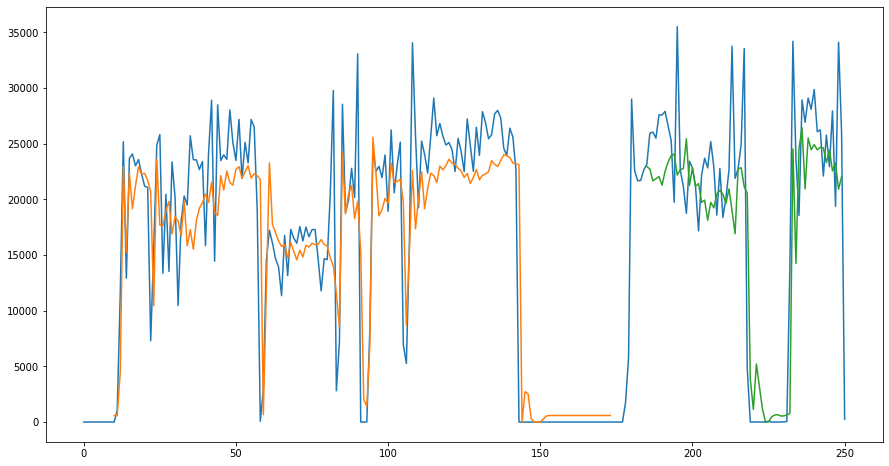

In [339]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [340]:
len(test)

76

In [341]:
x_input=test[66:].reshape(1,-1)
x_input.shape

(1, 10)

In [342]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [343]:
temp_input

[0.7344225352112677,
 0.739112676056338,
 0.6222816901408451,
 0.7257605633802817,
 0.6457323943661972,
 0.7869295774647888,
 0.5453661971830986,
 0.9607887323943662,
 0.729718309859155,
 0.007183098591549296]

In [344]:
# demonstrate prediction for next 24 hrs
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<24):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} Reading input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} Reading output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.01626191]
11
1 Reading input [0.73911268 0.62228169 0.72576056 0.64573239 0.78692958 0.5453662
 0.96078873 0.72971831 0.0071831  0.01626191]
1 Reading output [[0.15219124]]
2 Reading input [0.62228169 0.72576056 0.64573239 0.78692958 0.5453662  0.96078873
 0.72971831 0.0071831  0.01626191 0.15219124]
2 Reading output [[0.5064916]]
3 Reading input [0.72576056 0.64573239 0.78692958 0.5453662  0.96078873 0.72971831
 0.0071831  0.01626191 0.15219124 0.5064916 ]
3 Reading output [[0.64391375]]
4 Reading input [0.64573239 0.78692958 0.5453662  0.96078873 0.72971831 0.0071831
 0.01626191 0.15219124 0.5064916  0.64391375]
4 Reading output [[0.5148895]]
5 Reading input [0.78692958 0.5453662  0.96078873 0.72971831 0.0071831  0.01626191
 0.15219124 0.5064916  0.64391375 0.51488948]
5 Reading output [[0.51175714]]
6 Reading input [0.5453662  0.96078873 0.72971831 0.0071831  0.01626191 0.15219124
 0.5064916  0.64391375 0.51488948 0.51175714]
6 Reading output [[0.5083441]]
7 Reading input [0.9607

In [345]:
day_new=np.arange(1,11)
day_pred=np.arange(11,35)

In [346]:
len(df)

251

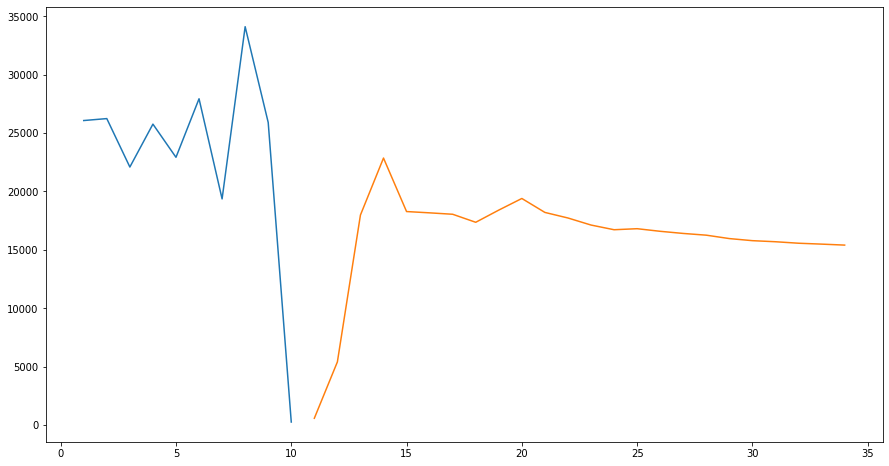

In [347]:
plt.plot(day_new,scaler.inverse_transform(df[241:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

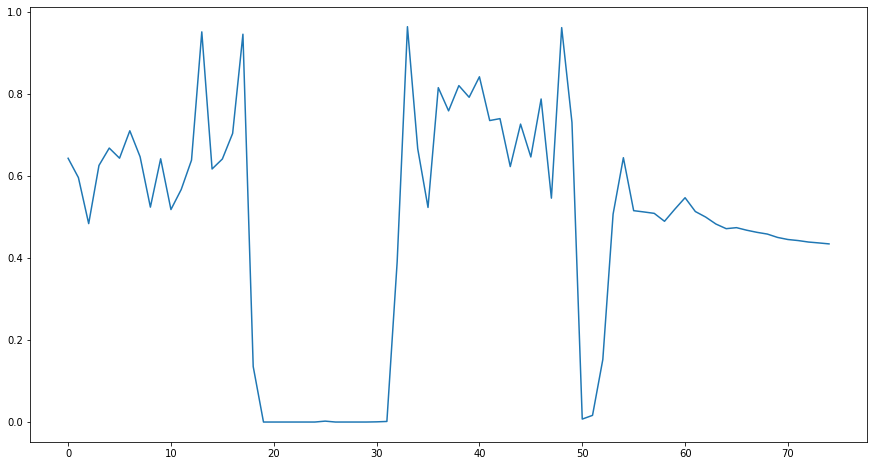

In [348]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df1[200:])

In [349]:
df1=scaler.inverse_transform(df1).tolist()

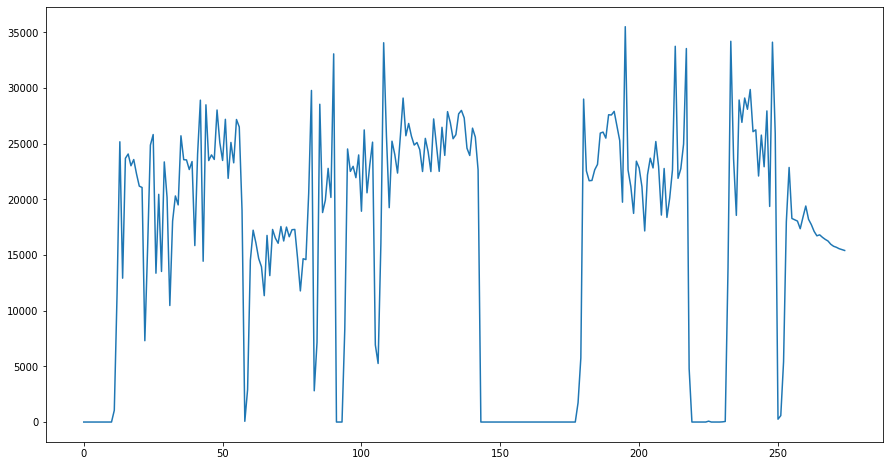

In [350]:
plt.plot(df1)

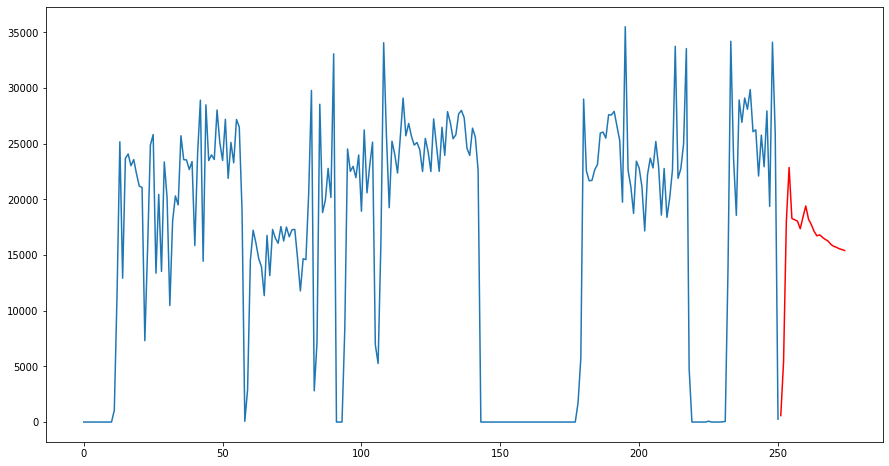

In [351]:
y_list = [[np.nan]]*len(df1)
y_list[251:] = df1[251:]
plt.plot(df1[:251])
plt.plot(y_list, color='r')

**LSTM - Predictions for Filler**

In [352]:
# Removing unncessary columns
df_filler = beverage_df.drop(['Blower','Labeller'], axis=1)
df_filler.head()

,Filler
time,
2020-08-16 00:00:00+00:00,0.0
2020-08-16 01:00:00+00:00,0.0
2020-08-16 02:00:00+00:00,0.0
2020-08-16 03:00:00+00:00,0.0
2020-08-16 04:00:00+00:00,0.0


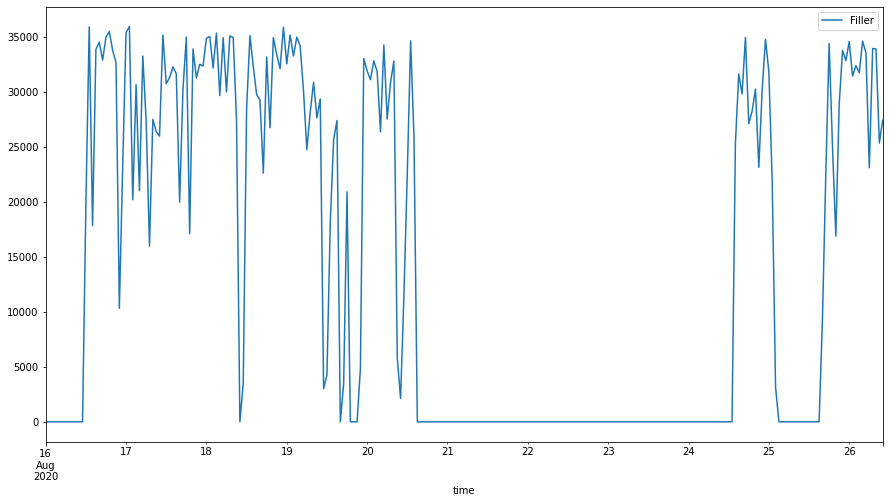

In [353]:
#Plotting the data
import matplotlib.pyplot as plt
df_filler.plot()
plt.show()

In [354]:
df_filler.iloc[111:144] = df_filler.iloc[63:96].to_numpy()

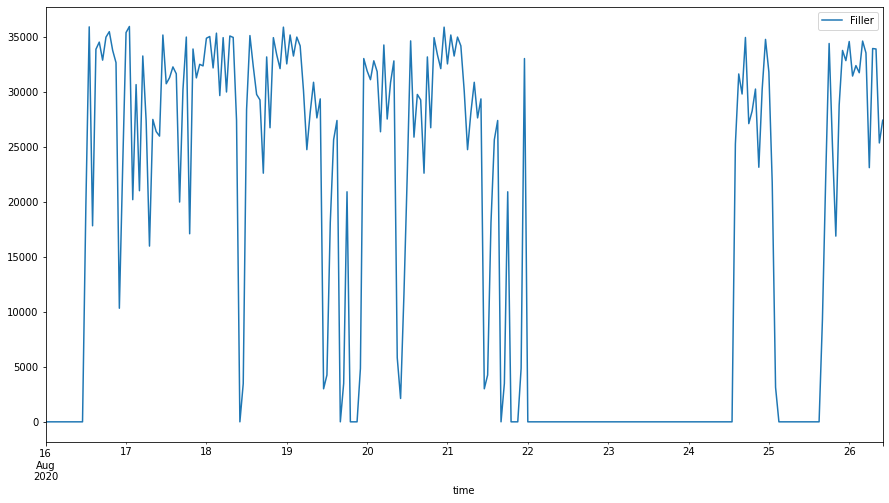

In [355]:
df_filler.plot()

In [356]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df_filler = scaler.fit_transform(df_filler)

In [357]:
# split into train and test sets
train_size = int(len(df_filler) * 0.70)
test_size = len(df_filler) - train_size
train, test = df_filler[0:train_size,:], df_filler[train_size:len(df_filler),:]
print(len(train), len(test))

175 76


In [358]:
# convert an array of values into a dataset matrix
def create_dataset(df_filler, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df_filler)-look_back-1):
		a = df_filler[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df_filler[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [359]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [360]:
trainX[:20]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.34585211e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.34585211e-05,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 8.34585211e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.34585211e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.48016469e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.34585211e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.48016469e-01, 9.99054137e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.34585211e-05,
   

In [361]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [362]:
print(trainX.shape)
print(testX.shape)

(164, 10, 1)
(65, 10, 1)


In [363]:
model=Sequential()
model.add(LSTM(8,return_sequences=True,input_shape=(look_back,1)))
model.add(LSTM(8,return_sequences=True))
model.add(LSTM(8))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX, trainY, validation_data=(testX,testY), epochs=300, batch_size=5, verbose=2)

Epoch 1/300
33/33 - 1s - loss: 0.3755 - val_loss: 0.1703
Epoch 2/300
33/33 - 0s - loss: 0.1494 - val_loss: 0.1541
Epoch 3/300
33/33 - 0s - loss: 0.1135 - val_loss: 0.1459
Epoch 4/300
33/33 - 0s - loss: 0.1080 - val_loss: 0.1406
Epoch 5/300
33/33 - 0s - loss: 0.1073 - val_loss: 0.1456
Epoch 6/300
33/33 - 0s - loss: 0.1061 - val_loss: 0.1427
Epoch 7/300
33/33 - 0s - loss: 0.1033 - val_loss: 0.1419
Epoch 8/300
33/33 - 0s - loss: 0.1020 - val_loss: 0.1395
Epoch 9/300
33/33 - 0s - loss: 0.1000 - val_loss: 0.1364
Epoch 10/300
33/33 - 0s - loss: 0.0980 - val_loss: 0.1380
Epoch 11/300
33/33 - 0s - loss: 0.1003 - val_loss: 0.1341
Epoch 12/300
33/33 - 0s - loss: 0.0986 - val_loss: 0.1332
Epoch 13/300
33/33 - 0s - loss: 0.0970 - val_loss: 0.1301
Epoch 14/300
33/33 - 0s - loss: 0.0955 - val_loss: 0.1269
Epoch 15/300
33/33 - 0s - loss: 0.0959 - val_loss: 0.1245
Epoch 16/300
33/33 - 0s - loss: 0.0955 - val_loss: 0.1230
Epoch 17/300
33/33 - 0s - loss: 0.0951 - val_loss: 0.1208
Epoch 18/300
33/33 - 0s

In [364]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 6770.66 RMSE
Test Score: 7971.38 RMSE


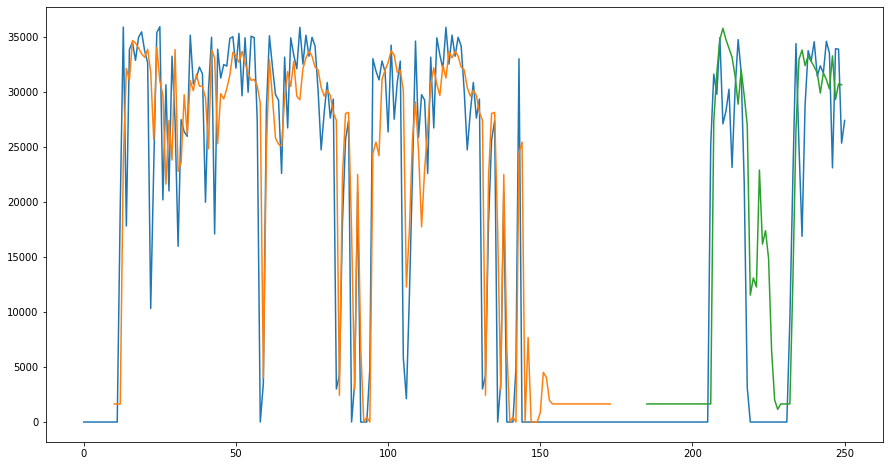

In [365]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(df_filler)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

trainPredictPlot[trainPredictPlot<0] = 0

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_filler)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df_filler)-1, :] = testPredict

testPredictPlot[testPredictPlot<0] = 0

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_filler))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [366]:
len(test)
x_input=test[66:].reshape(1,-1)
x_input.shape

(1, 10)

In [367]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

temp_input

[0.8746453012852612,
 0.9010460134646414,
 0.8830189729038002,
 0.9631113336671674,
 0.9330662660657654,
 0.6429088076559283,
 0.9442775274022145,
 0.9431091081066043,
 0.7054192399710677,
 0.7628943415122684]

In [368]:
# demonstrate prediction for next 24 hrs
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<24):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} Reading input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} Reading output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8124709]
11
1 Reading input [0.90104601 0.88301897 0.96311133 0.93306627 0.64290881 0.94427753
 0.94310911 0.70541924 0.76289434 0.81247091]
1 Reading output [[0.8064443]]
2 Reading input [0.88301897 0.96311133 0.93306627 0.64290881 0.94427753 0.94310911
 0.70541924 0.76289434 0.81247091 0.80644429]
2 Reading output [[0.80598634]]
3 Reading input [0.96311133 0.93306627 0.64290881 0.94427753 0.94310911 0.70541924
 0.76289434 0.81247091 0.80644429 0.80598634]
3 Reading output [[0.80898386]]
4 Reading input [0.93306627 0.64290881 0.94427753 0.94310911 0.70541924 0.76289434
 0.81247091 0.80644429 0.80598634 0.80898386]
4 Reading output [[0.8460266]]
5 Reading input [0.64290881 0.94427753 0.94310911 0.70541924 0.76289434 0.81247091
 0.80644429 0.80598634 0.80898386 0.8460266 ]
5 Reading output [[0.86439824]]
6 Reading input [0.94427753 0.94310911 0.70541924 0.76289434 0.81247091 0.80644429
 0.80598634 0.80898386 0.8460266  0.86439824]
6 Reading output [[0.82098776]]
7 Reading input [0.94

In [369]:
day_new=np.arange(1,11)
day_pred=np.arange(11,35)

In [370]:
len(df_filler)

251

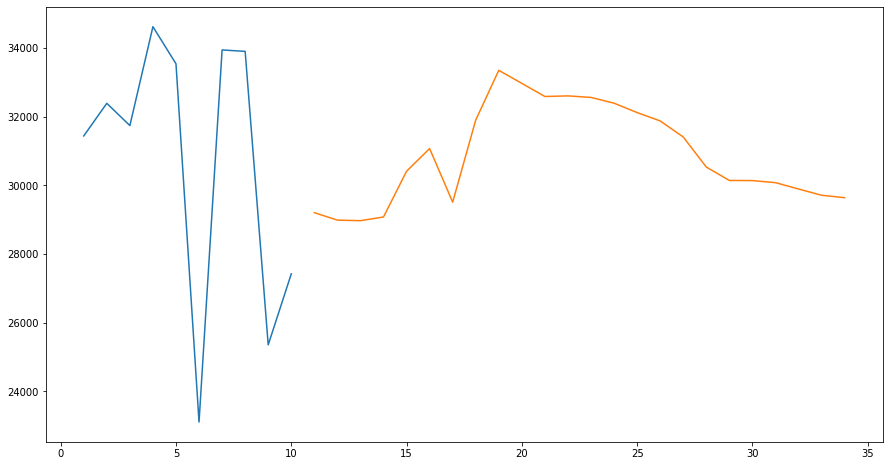

In [371]:
plt.plot(day_new,scaler.inverse_transform(df_filler[241:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

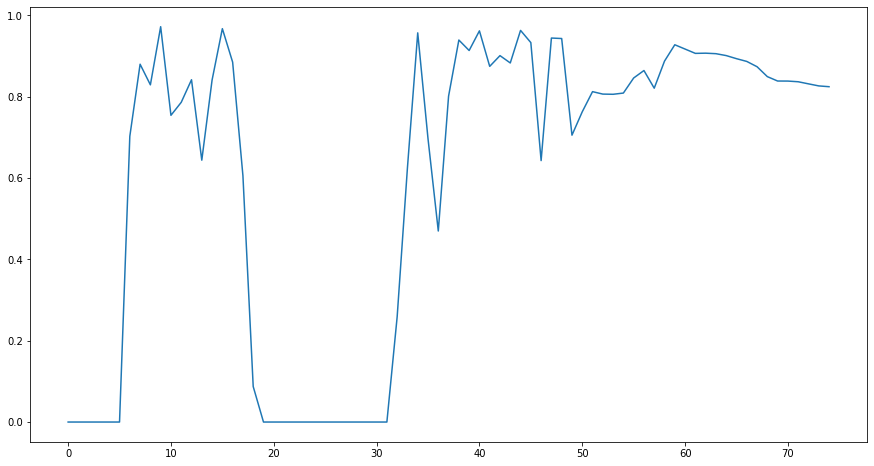

In [372]:
df1_filler=df_filler.tolist()
df1_filler.extend(lst_output)
plt.plot(df1_filler[200:])

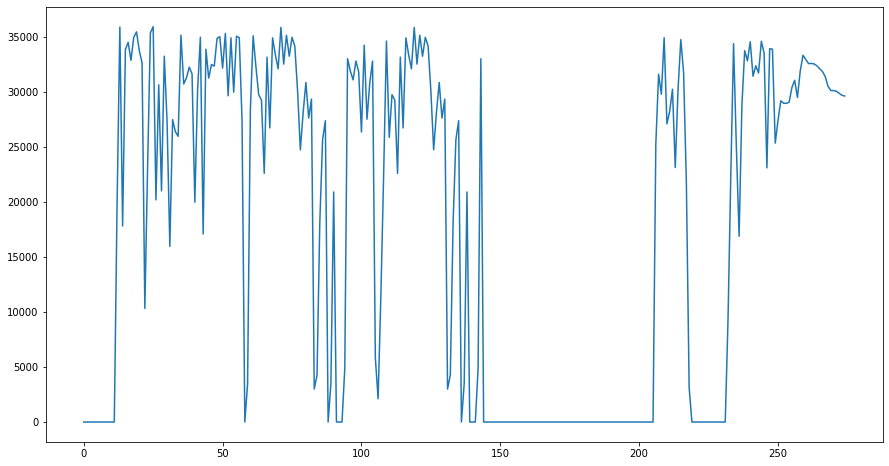

In [373]:
df1_filler=scaler.inverse_transform(df1_filler).tolist()
plt.plot(df1_filler)

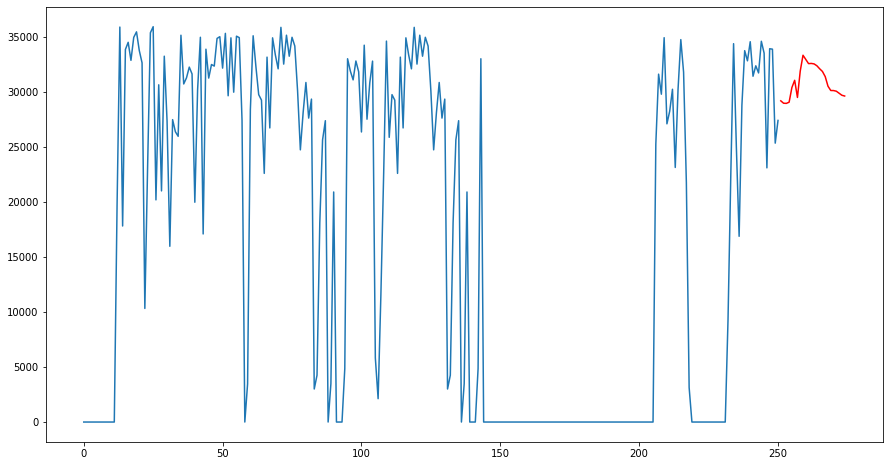

In [374]:
y_list = [[np.nan]]*len(df1_filler)
y_list[251:] = df1_filler[251:]
plt.plot(df1_filler[:251])
plt.plot(y_list, color='r')

**LSTM - Predictions for Labeller**

In [375]:
# Removing unncessary columns
df_labeller = beverage_df.drop(['Filler','Blower'], axis=1)
df_labeller.head()

,Labeller
time,
2020-08-16 00:00:00+00:00,2.0
2020-08-16 01:00:00+00:00,0.0
2020-08-16 02:00:00+00:00,0.0
2020-08-16 03:00:00+00:00,0.0
2020-08-16 04:00:00+00:00,0.0


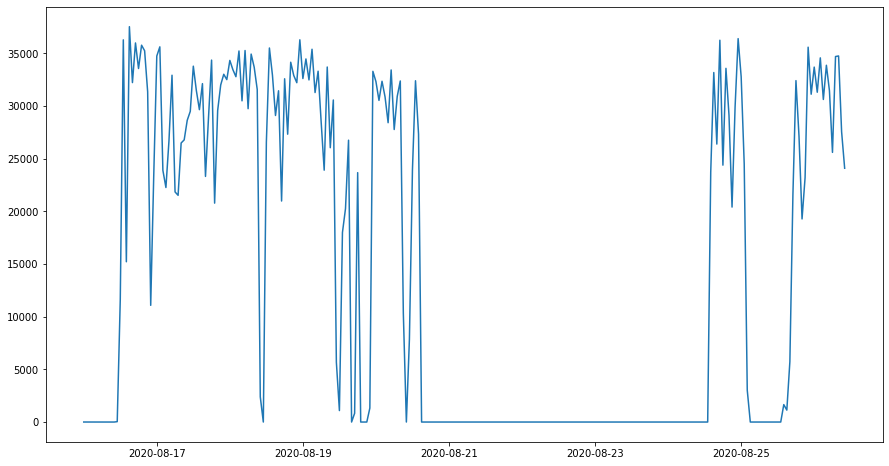

In [376]:
#Plotting the data
import matplotlib.pyplot as plt
plt.plot(df_labeller)
plt.show()

In [377]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df_labeller = scaler.fit_transform(df_labeller)

In [378]:
# split into train and test sets
train_size = int(len(df_labeller) * 0.70)
test_size = len(df_labeller) - train_size
train, test = df_labeller[0:train_size,:], df_labeller[train_size:len(df_labeller),:]
print(len(train), len(test))


175 76


In [379]:
# convert an array of values into a dataset matrix
def create_dataset(df_labeller, look_back=1):
  dataX, dataY = [], []
  for i in range(len(df_labeller)-look_back-1):
    a = df_labeller[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(df_labeller[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [380]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [381]:
trainX[:20]

array([[5.32878610e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.59181498e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.59181498e-04, 3.09975488e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.59181498e-04,
        3.09975488e-01, 9.66695087e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
   

In [382]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [383]:
print(trainX.shape)
print(testX.shape)

(164, 10, 1)
(65, 10, 1)


In [384]:
model=Sequential()
model.add(LSTM(8,return_sequences=True,input_shape=(look_back,1)))
model.add(LSTM(8,return_sequences=True))
model.add(LSTM(8))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX, trainY, validation_data=(testX,testY), epochs=300, batch_size=5, verbose=2)

Epoch 1/300
33/33 - 1s - loss: 0.2187 - val_loss: 0.1366
Epoch 2/300
33/33 - 0s - loss: 0.0989 - val_loss: 0.1166
Epoch 3/300
33/33 - 0s - loss: 0.0862 - val_loss: 0.1169
Epoch 4/300
33/33 - 0s - loss: 0.0790 - val_loss: 0.1161
Epoch 5/300
33/33 - 0s - loss: 0.0772 - val_loss: 0.1153
Epoch 6/300
33/33 - 0s - loss: 0.0768 - val_loss: 0.1160
Epoch 7/300
33/33 - 0s - loss: 0.0772 - val_loss: 0.1131
Epoch 8/300
33/33 - 0s - loss: 0.0751 - val_loss: 0.1109
Epoch 9/300
33/33 - 0s - loss: 0.0759 - val_loss: 0.1074
Epoch 10/300
33/33 - 0s - loss: 0.0762 - val_loss: 0.1058
Epoch 11/300
33/33 - 0s - loss: 0.0731 - val_loss: 0.1027
Epoch 12/300
33/33 - 0s - loss: 0.0706 - val_loss: 0.1002
Epoch 13/300
33/33 - 0s - loss: 0.0703 - val_loss: 0.0978
Epoch 14/300
33/33 - 0s - loss: 0.0714 - val_loss: 0.0942
Epoch 15/300
33/33 - 0s - loss: 0.0743 - val_loss: 0.0916
Epoch 16/300
33/33 - 0s - loss: 0.0680 - val_loss: 0.0903
Epoch 17/300
33/33 - 0s - loss: 0.0669 - val_loss: 0.0855
Epoch 18/300
33/33 - 0s

In [385]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5695.62 RMSE
Test Score: 6633.10 RMSE


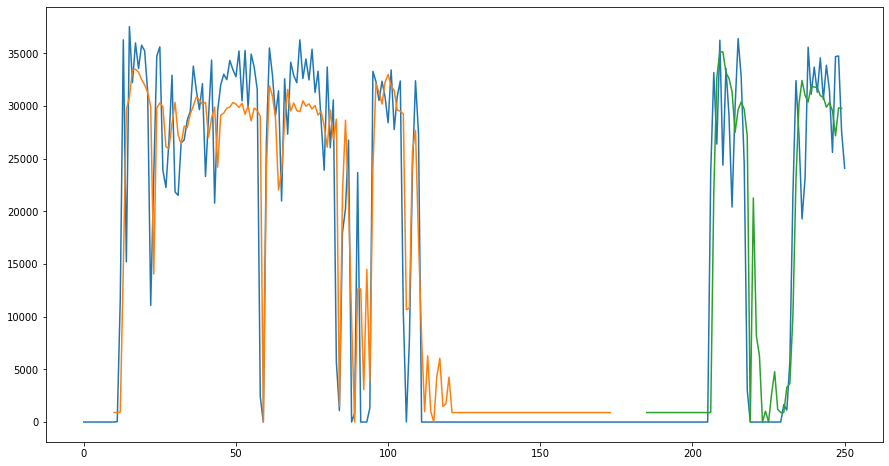

In [386]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(df_labeller)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

trainPredictPlot[trainPredictPlot<0] = 0

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_labeller)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df_labeller)-1, :] = testPredict

testPredictPlot[testPredictPlot<0] = 0

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_labeller))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [387]:
len(test)
x_input=test[66:].reshape(1,-1)
x_input.shape

(1, 10)

In [388]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [389]:
temp_input

[0.8342214643504209,
 0.9211339656826174,
 0.8159170840882447,
 0.9024299264627518,
 0.838244697857828,
 0.6820579771927955,
 0.9245177448577213,
 0.9259565171054034,
 0.7342001492060108,
 0.6419322178407758]

In [390]:
# demonstrate prediction for next 24 hrs
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<24):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} Reading input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} Reading output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7026689]
11
1 Reading input [0.92113397 0.81591708 0.90242993 0.8382447  0.68205798 0.92451774
 0.92595652 0.73420015 0.64193222 0.70266891]
1 Reading output [[0.73451686]]
2 Reading input [0.81591708 0.90242993 0.8382447  0.68205798 0.92451774 0.92595652
 0.73420015 0.64193222 0.70266891 0.73451686]
2 Reading output [[0.74163693]]
3 Reading input [0.90242993 0.8382447  0.68205798 0.92451774 0.92595652 0.73420015
 0.64193222 0.70266891 0.73451686 0.74163693]
3 Reading output [[0.7430676]]
4 Reading input [0.8382447  0.68205798 0.92451774 0.92595652 0.73420015 0.64193222
 0.70266891 0.73451686 0.74163693 0.74306762]
4 Reading output [[0.74746114]]
5 Reading input [0.68205798 0.92451774 0.92595652 0.73420015 0.64193222 0.70266891
 0.73451686 0.74163693 0.74306762 0.74746114]
5 Reading output [[0.75193197]]
6 Reading input [0.92451774 0.92595652 0.73420015 0.64193222 0.70266891 0.73451686
 0.74163693 0.74306762 0.74746114 0.75193197]
6 Reading output [[0.7560323]]
7 Reading input [0.92

In [391]:
day_new=np.arange(1,11)
day_pred=np.arange(11,35)

In [392]:
len(df_labeller)

251

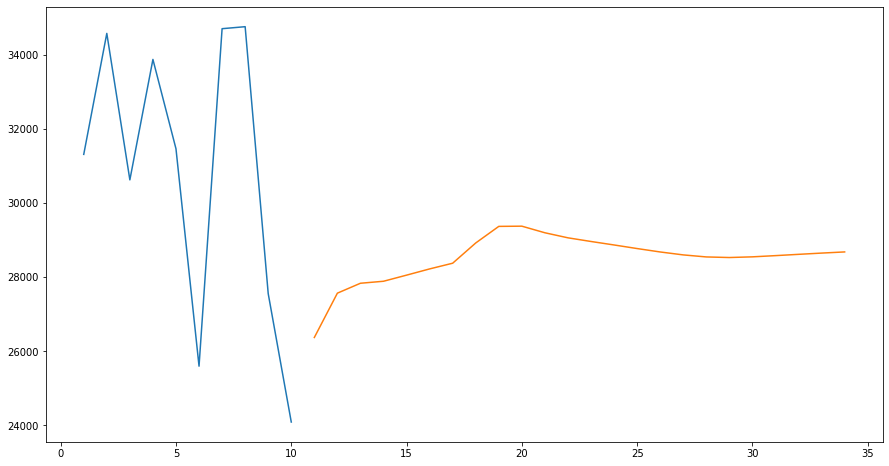

In [393]:
plt.plot(day_new,scaler.inverse_transform(df_labeller[241:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

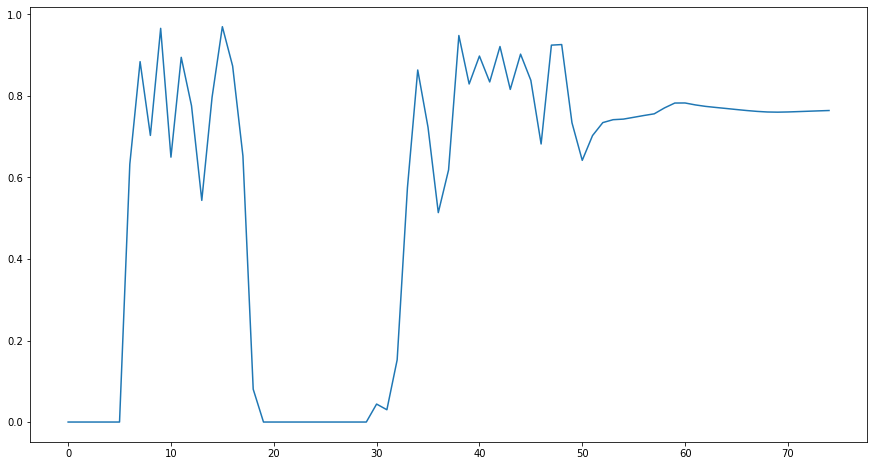

In [394]:
df1_labeller=df_labeller.tolist()
df1_labeller.extend(lst_output)
plt.plot(df1_labeller[200:])

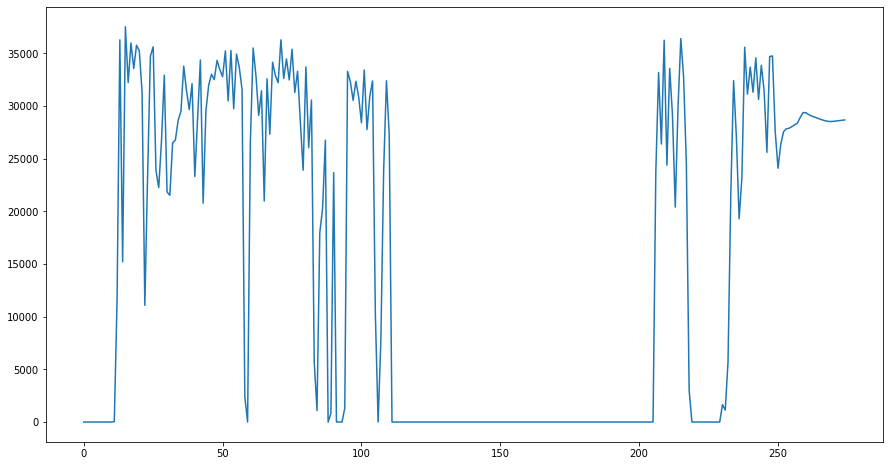

In [395]:
df1_labeller=scaler.inverse_transform(df1_labeller).tolist()
plt.plot(df1_labeller)

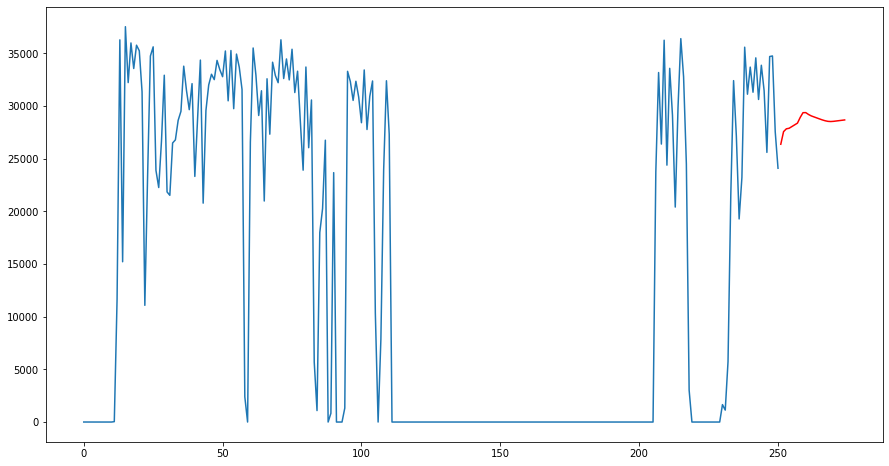

In [396]:
y_list = [[np.nan]]*len(df1_labeller)
y_list[251:] = df1_labeller[251:]
plt.plot(df1_labeller[:251])
plt.plot(y_list, color='r')